In [115]:
# from google.colab import drive
# drive.mount('/content/drive')

In [116]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit, KFold, cross_val_score

# Đọc dữ liệu

In [117]:
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Mô tả sơ lược về dữ liệu

In [118]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [119]:
len(data)

20640

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

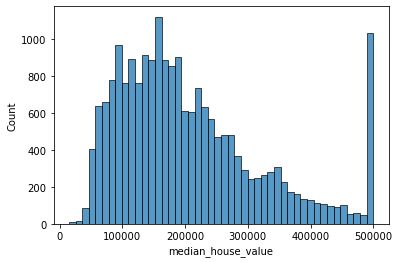

In [120]:
sns.histplot(data['median_house_value'])

## Câu hỏi 1
Dựa vào kết quả thu được, hãy cho biết khoảng min - max của biến mục tiêu (median_house_value) trong bộ dữ liệu. Có nhận xét gì về miền giá trị của biến mục tiêu? (giá trị min-max, mean, median như thế nào?)

$\rightarrow$ Khoảng min-max của biến mục tiêu median_house_value trong bộ dữ liệu là đoạn $[14999;500001]$   

$\rightarrow$ Ta có thể thấy miền giá trị của biến mục tiêu phân bố không đều, hầu hết các điểm dữ liệu có xu hướng nằm trong đoạn từ min tới 300000, trong khi đó, tần suất xuất hiện của giá trị max lại cao thứ 2 so với tần suất của các giá trị còn lại

In [121]:
data['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

## Câu hỏi 2
Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu thuộc tính?

In [122]:
print(f"Dữ liệu có {len(data)} dòng, và có tổng cộng {len(data.columns)} thuộc tính")

Dữ liệu có 20640 dòng, và có tổng cộng 10 thuộc tính


## Câu hỏi 3
Cho biết số lượng các giá trị NA trong thuộc tính 

In [123]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Câu hỏi 4
Vẽ ma trận tương quan giữa các thuộc tính   
Cho biết mức độ tương quan giữa các thuộc tính với nhau

#### Ma trận tương quan giữa các thuộc tính

<AxesSubplot:>

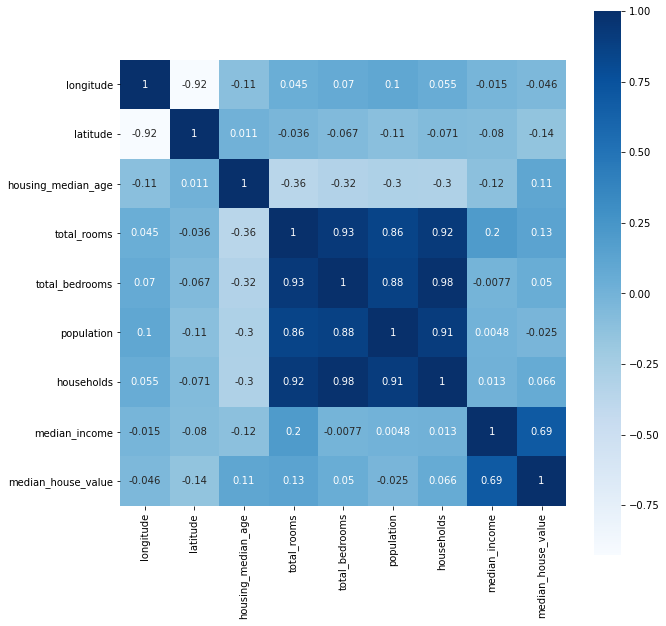

In [124]:
correlation = data.corr(method='pearson')

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

### Nhận xét về sự tương quan giữa các đặc trưng
Dựa vào ma trận tương quan, ta có thể thấy được rằng: 
- Đặc trưng về kinh độ và vĩ độ là 2 đặc trưng có mức độ tương quan yếu nhất trong tất cả các đặc trưng, điều này có thể dễ dàng hiểu được vì gần như 2 đặc trưng này nó ít có sự liên quan hay phụ thuộc lẫn nhau 
- total_rooms, total_bedrooms, population và household là nhóm đặc trưng có sự tương quan chặt chẽ với nhau nhất, ở đây ta có thể hiểu được rằng những hộ gia đình càng nhiều người thì càng phải cần có nhiều phòng, nhiều phòng ngủ, cũng như cần phải có nhiều tiện nghi hơn so với những gia đình ít người
- Nhóm đặc trưng có tương quan mạnh nhưng yếu hơn nhóm 4 đặc trưng phía trên đó chính là giữa median_income và median_house_value, ta có thể hiểu được điều này bởi vì những hộ gia đình có điều kiện thu nhập cao thường sẽ có xu hướng chọn mua những căn nhà đắt tiền hơn so với những hộ gia đình có điều kiện kinh tế hạn chế hơn
- Và ngoài 3 nhóm trên, ta có thể thấy rằng những đặc trưng còn lại có mức độ tương quan khá yếu (đa phần có sự tương quan dưới 0.1)

## Câu hỏi 5

### Scatter plot giữa thuộc tính median_income và thuộc tính median_house_value

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

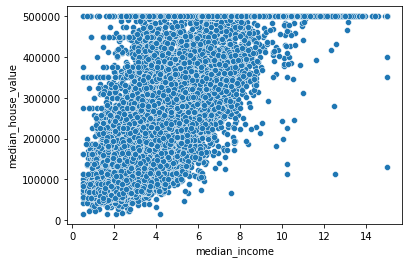

In [125]:
sns.scatterplot(data=data, x="median_income", y="median_house_value")

# Xây dựng mô hình

## Chuẩn bị dữ liệu

In [126]:
# Lay thuoc tinh median_income va median_house_value
X = data['median_income']
y = data['median_house_value']

## Câu hỏi 6

### Phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm thử theo tỉ lệ lần lượt là 8-2

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Cho biết chiều của từng tập dữ liệu

In [128]:
print(f"Số chiều của tập X_train: {X_train.shape}\nSố chiều của tập y_train: {y_train.shape}\n\nSố chiều của tập X_test: {X_test.shape}\nSố chiều của tập y_test:{y_test.shape}")

Số chiều của tập X_train: (16512,)
Số chiều của tập y_train: (16512,)

Số chiều của tập X_test: (4128,)
Số chiều của tập y_test:(4128,)


In [129]:
# Chuan hoa du lieu 
sc = MinMaxScaler()

y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

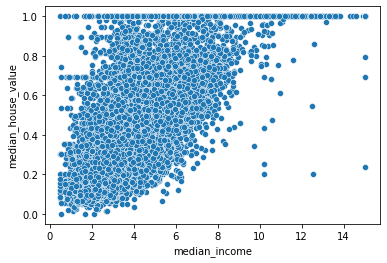

In [130]:
data = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})

# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="median_income", y="median_house_value")

## Huấn luyện và dự đoán

In [131]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
X_train.shape

(16512,)

In [133]:
y_train_transformed.shape

(16512,)

## Câu hỏi 7:
Dự đoán kết quả cho tập kiểm tra dựa vào mô hình đã huấn luyện, kết quả lưu vào biến y_pred

In [134]:
y_pred = model.predict(X_test.values.reshape(-1,1))
y_pred

array([0.20610207, 0.27960273, 0.3616371 , ..., 0.858763  , 0.30153793,
       0.36786231])

### Kết quả cho tập test

In [135]:
mean_squared_error(y_test_transformed, y_pred, squared=True)

0.030146027371035673

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

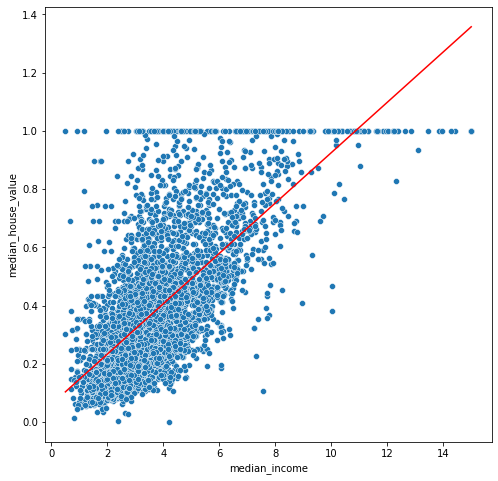

In [136]:
# truc quan hoa ket qua du doan va ket qua that 
test_true = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

# ket qua du doan cua mo hinh (duong thang)
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')

# ket qua thuc su (scatter plot)
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

## Câu hỏi 8:

### Thực hiện lại mô hình Hồi quy tuyến tính bằng phương pháp cross - valiation

In [137]:
X = data['median_income']
y = data['median_house_value']

In [138]:
sc = MinMaxScaler()
y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [139]:
len(y_transformed)

16512

In [140]:
len(X)

16512

In [141]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1,1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1,1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    avg_mse.append(result)

In [142]:
np.mean(np.array(avg_mse))

0.030043754459000566

# Bài 2: Dự đoán cho thuộc tính total_bedrooms

In [143]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [144]:
# Liet ke cac thuoc tinh null 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [145]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [146]:
X = data['total_bedrooms']
y = data['median_house_value']

### Xử lí thuộc tính null

In [147]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(X.values.reshape(-1,1))

In [148]:
sc = MinMaxScaler()
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [149]:
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index].reshape(-1,1)
    y_train = y[train_index]

    X_test = X[test_index].reshape(-1,1)
    y_test = y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    avg_mse.append(result)

In [150]:
print(f"Độ lỗi = {np.mean(np.array(avg_mse))}")

Độ lỗi = 0.0562844775971713


### So sánh kết quả khi dự đoán bằng thuộc tính median_income với khi dự đoán bằng thuộc tính total_bedroom

- Ta có thể thấy độ lỗi khi dự đoán bằng thuộc tính total_bedroom là 0.06, trong khi đó, độ lỗi khi ta dự đoán bằng thuộc tính median_income là 0.03 khi cùng sử dụng thuật toán Linear Regression và sử dụng kĩ thuật KFold để train và test dữ liệu
$\rightarrow$ Ta có thể kết luận rằng khi tiến hành dự đoán bằng thuộc tính median_income thì sẽ có một độ chính xác tốt hơn khi ta sử dụng thuộc tính total_bedroom (xét trên cùng 1 tập dữ liệu và cùng 1 phương pháp)

# Bài 3

In [151]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [153]:
X = data.drop(columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_house_value', 'ocean_proximity'])
y = data['median_house_value']
X

,total_bedrooms,median_income
0,129.0,8.3252
1,1106.0,8.3014
2,190.0,7.2574
3,235.0,5.6431
4,280.0,3.8462
...,...,...
20635,374.0,1.5603
20636,150.0,2.5568
20637,485.0,1.7000
20638,409.0,1.8672


In [154]:
X.isnull().sum()

total_bedrooms    207
median_income       0
dtype: int64

In [155]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(X)
X

array([[ 129.    ,    8.3252],
       [1106.    ,    8.3014],
       [ 190.    ,    7.2574],
       ...,
       [ 485.    ,    1.7   ],
       [ 409.    ,    1.8672],
       [ 616.    ,    2.3886]])

In [156]:
sc = MinMaxScaler()
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [157]:
len(X), len(y)

(20640, 20640)

In [158]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    avg_mse.append(result)

In [159]:
print(f"Độ lỗi: {np.mean(avg_mse)}")

Độ lỗi: 0.02983058146343538


## Nhận xét kết quả:
Ta có thể thấy khi kết hợp cả 2 thuộc tính median_income và total_bedroom để dự đoán bằng K-fold với 10 folds trên thuật toán Linear Regression, độ lỗi của thuật toán nhỏ hơn so với khi dự đoán bằng thuộc tính total_bedroom, tuy nhiên độ lỗi khi so sánh với việc dự đoán bằng thuộc tính median_income là xấp xỉ so với khi kết hợp cả 2 thuộc tính